<a href="https://colab.research.google.com/github/ruthetum/Deeplearning-NLP/blob/master/LogisticRegressionByKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 케라스로 구현하는 로지스틱 회귀

기본 세팅

In [1]:
%tensorflow_version 2.x

import tensorflow as tf

print('version : ', tf.__version__)
print('GPU Available : ', tf.test.is_gpu_available())

import nltk
!pip install konlpy
import konlpy

TensorFlow 2.x selected.
version :  2.1.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU Available :  False
     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 92kB 10.5MB/s 
     |████████████████████████████████| 2.4MB 46.9MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0


sequential : 모델 만들기

dense : 모델의 차원 결정 (독립변수와 종속변수의 수)

optimizers : 최적화 방법 선택

# 로지스틱 회귀에서는 손실 함수로 MSE를 사용하면

# 로컬 미니멈(Local Minimum)에 빠질 수 있기 때문에

# 손실 함수로 크로스 엔트로피 함수를 사용

In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

X=np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y=np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) #숫자 10부터 1

model=Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))
sgd=optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd ,loss='binary_crossentropy',metrics=['binary_accuracy']) # sgd : 경사하강법, 손실함수로 크로스 엔트로피 사용
model.fit(X,y, batch_size=1, epochs=200, shuffle=False)

Train on 13 samples
Epoch 1/200
13/13 [==============================] - 0s 32ms/sample - loss: 5.9412 - binary_accuracy: 0.6923
Epoch 2/200
13/13 [==============================] - 0s 1ms/sample - loss: 0.2028 - binary_accuracy: 0.9231
Epoch 3/200
13/13 [==============================] - 0s 2ms/sample - loss: 0.2005 - binary_accuracy: 0.9231
Epoch 4/200
13/13 [==============================] - 0s 1ms/sample - loss: 0.1986 - binary_accuracy: 0.9231
Epoch 5/200
13/13 [==============================] - 0s 2ms/sample - loss: 0.1969 - binary_accuracy: 0.9231
Epoch 6/200
13/13 [==============================] - 0s 1ms/sample - loss: 0.1952 - binary_accuracy: 0.9231
Epoch 7/200
13/13 [==============================] - 0s 2ms/sample - loss: 0.1937 - binary_accuracy: 0.9231
Epoch 8/200
13/13 [==============================] - 0s 1ms/sample - loss: 0.1921 - binary_accuracy: 0.9231
Epoch 9/200
13/13 [==============================] - 0s 1ms/sample - loss: 0.1906 - binary_accuracy: 0.9231
Epoch 1

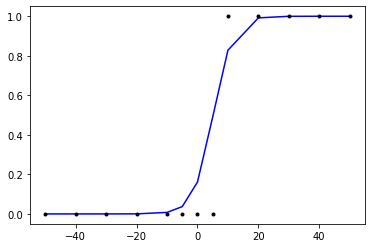

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, model.predict(X), 'b', X,y, 'k.')

X의 값이 기준(5)보다 작을 때는 0.5보다 작은 값을

X의 값이 기준(5)보다 클 때는 0.5보다 큰 값을 출력

In [4]:
print(model.predict([1, 2, 3, 4, 4.5]))
print(model.predict([11, 21, 31, 41, 500]))

[[0.2096671 ]
 [0.26798666]
 [0.33563888]
 [0.4107857 ]
 [0.4502446 ]]
[[0.8691863 ]
 [0.9940269 ]
 [0.9997601 ]
 [0.99999046]
 [1.        ]]
